In [1]:
# from labmate.utils import autoreload
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt

from pltsave import convert
from pltsave import stuctures

from pltsave import json_coders

import pltsave

from tests.test_utils import get_data

In [2]:
colors = ["#0066cc", "#ffcc00", "#ff7400", "#962fbf"]

Text(0.5, 1.0, 'Some title')

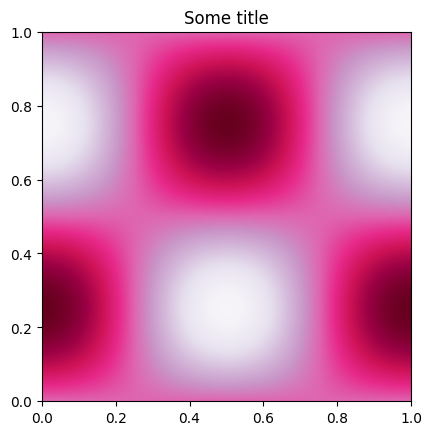

In [9]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2 * np.pi, 1024)
data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]

fig, ax = plt.subplots()
# , extent=[0, 1, 0, 1])
im = ax.imshow(data2d, origin="lower", cmap="PuRd", extent=[0, 1, 0, 1])
ax.set_title("Some title")

# fig.colorbar(im, ax=ax, label="Power")

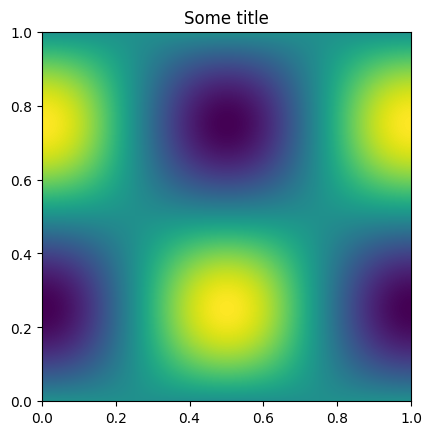

In [10]:
jsn = pltsave.dumps(fig).to_json()
with open("test.json", "w") as f:
    f.write(jsn)
fig.savefig("test.png")
fig.savefig("test.svg")
fig2, info = pltsave.loads(jsn)
# fig2.get_axes()[0].set_title("New title")

(0.0, 1000.0)

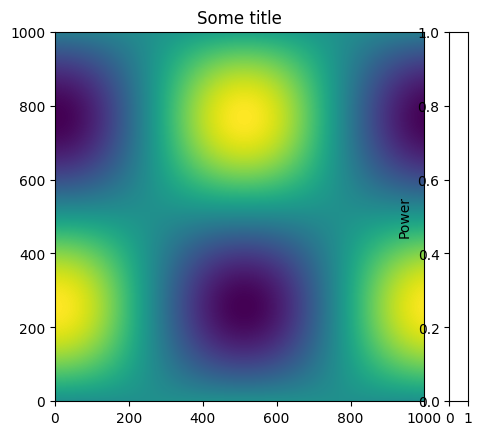

In [10]:
fig2, info = pltsave.loads(jsn)
fig2.get_axes()[0].set_ylim(0, 1000)
fig2.get_axes()[0].set_xlim(0, 1000)

In [11]:
l = fig.get_children()[1].get_children()[0]
print(len(fig.get_children()[1].get_children()))
print(fig.get_children())
fig.get_children()[1].get_children()

11
[<matplotlib.patches.Rectangle object at 0x1350d7d60>, <Axes: title={'center': 'Some title'}>]


 Text(0.5, 1.0, 'Some title'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [16]:
l.get_cmap().name

'PuRd'

In [18]:
l.arrowprops, l.xy, l.xycoords, (l._x, l._y)

AttributeError: 'Text' object has no attribute 'arrowprops'

In [52]:
l.get_x()

AttributeError: 'Annotation' object has no attribute 'get_x'

In [37]:
l.get_anncoords()

'data'

In [92]:
l._axes.get_xaxis_transform(which="grid") is l.get_transform()

True

In [75]:
from matplotlib.transforms import CompositeGenericTransform, BlendedGenericTransform

In [78]:
isinstance(l.get_transform(), BlendedGenericTransform)

True

In [64]:
l.get_transform()._a, l.get_transform()._b

AttributeError: 'BlendedGenericTransform' object has no attribute '_a'

In [4]:
# jsn = pltsave.dumps(fig).to_json()
# print(jsn)

line:  Line2D(data)
line:  Line2D(fit)
line:  Line2D(vertical line)


AttributeError: 'NoneType' object has no attribute 'get_xaxis_transform'

<Figure size 640x480 with 0 Axes>

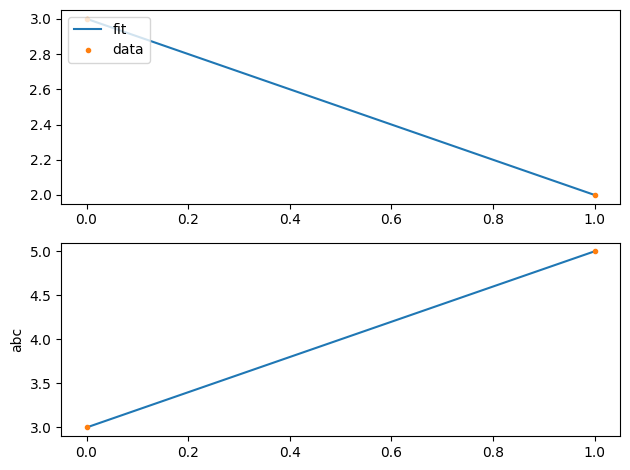

In [24]:
fig, ax = plt.subplots(2, 1)

ax[0].plot([0, 1], [3, 2], label="fit")
ax[0].plot([0, 1], [3, 2], ".", label="data")

ax[1].plot([0, 1], [3, 5], label="fit")
ax[1].plot([0, 1], [3, 5], ".", label="data")

ax[1].set_ylabel("abc")

ax[0].legend(loc=2)

fig.tight_layout()
fig.savefig("original.png")

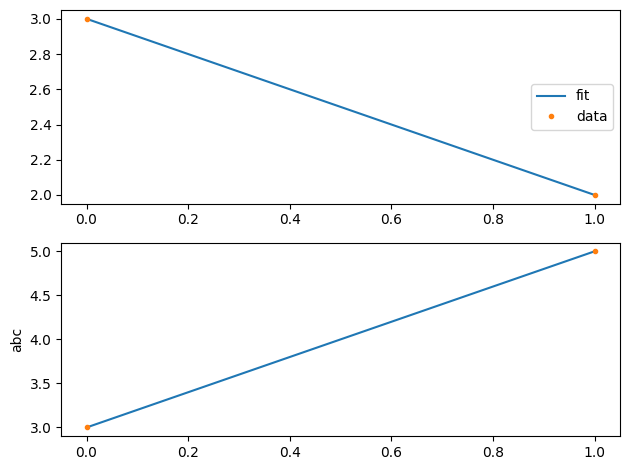

In [20]:
jsn = pltsave.dumps(fig).to_json()
fig_reconstructed = pltsave.loads(jsn)

fig_reconstructed.savefig("reconstructed.png")
fig.savefig("original.png")

In [28]:
import unittest
from PIL import Image


def images_are_similar(image1_path, image2_path, tolerance=0.02):
    """
    Compares two images and checks if their difference is within the tolerance.
    Tolerance is the maximum number of pixels that can differ.
    """
    with Image.open(image1_path) as img1, Image.open(image2_path) as img2:
        if img1.size != img2.size or img1.mode != img2.mode:
            return False

        # Calculate the difference
        pairs = zip(img1.getdata(), img2.getdata())
        if len(img1.getbands()) == 1:
            # for grayscale images
            dif = sum(abs(p1 - p2) for p1, p2 in pairs)
        else:
            dif = sum(abs(c1 - c2) for p1, p2 in pairs for c1, c2 in zip(p1, p2))

        # Calculate the percentage of different pixels
        ncomponents = img1.size[0] * img1.size[1] * len(img1.getbands())
        percentage = (dif / 255.0 * 100) / ncomponents

        # Check if the difference is within tolerance
        return percentage <= tolerance

In [29]:
images_are_similar("original.png", "reconstructed.png")

False

In [4]:
x = fig.get_children()[-1]

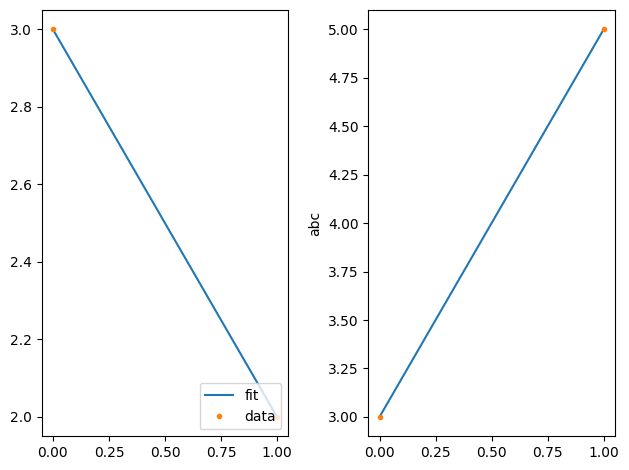

In [6]:
fi = convert.dumps(fig)
fi_json = fi.to_json()

# fi_restored= stuctures.FigureInfo.from_json(fi_json)
# fig2 = plt.figure()
_ = convert.loads(fi_json)

In [13]:
fi_restored.children[0]

AxesInfo(xlim=[-0.05, 1.05], ylim=[1.95, 3.05], rect=[0.125, 0.125, 0.35227272727272724, 0.755])

<Axes:>

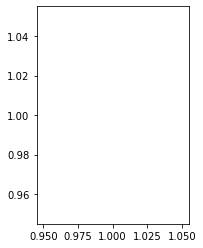

In [17]:
fig2 = plt.figure()

ax = plt.Axes(fig2, rect=[0.125, 0.125, 0.35227272727272724, 0.755])
ax.plot(1,1)
fig2.add_axes(ax)

In [32]:
import sympy as sp
import numpy as np

In [110]:
R1 = sp.Symbol("R1").__repr__()
R2 = sp.Symbol("R2")
C1 = sp.Symbol("C1")
C2 = sp.Symbol("C2")
ω = sp.Symbol("ω")

In [231]:
from IPython.display import display, Latex


class LatexStr(str):
    def _repr_latex_(self):
        return "$\\displaystyle " + self + "$"


class Equation:
    operation = ""

    def __init__(self, expr, *args, **kwargs):
        self.expr = expr
        self.args = args
        self.operation = kwargs.get("operation")

    @classmethod
    def mult(cls, *args):
        operation_args = [(arg if not isinstance(
            arg, Equation) else arg.expr) for arg in args]
        return cls(sp.Mul(*operation_args), *args, operation=r"\cdot")

    def __repr__(self):
        return sp.latex(self.expr)

    def full_equation(self):
        reprs = []
        for arg in self.args:
            if isinstance(arg, Equation):
                reprs.append(arg.full_equation())
            else:
                reprs.append(sp.latex(arg))

        return self.operation.join(reprs)

    def _repr_latex_(self):
        return self.expr._repr_latex_()
        # return "$\\displaystyle " + self.full_equation() + "$"

    def equation(self):
        return LatexStr(self.full_equation())

In [236]:
m = Equation.mult(
    sp.Matrix([[1, 0], [1j * ω * C2, 1]]),
    sp.Matrix([[1, 0], [1 / R2, 1]]),
)

m.equation()

# s = m.equation()

'\\left[\\begin{matrix}1 & 0\\\\1.0 i C_{2} ω & 1\\end{matrix}\\right]\\cdot\\left[\\begin{matrix}1 & 0\\\\\\frac{1}{R_{2}} & 1\\end{matrix}\\right]'

In [227]:
trans = sp.Mul(
    sp.Matrix([[1, 0], [1j * ω * C2, 1]]),
    sp.Matrix([[1, 1 / (1 / R1 + 1j * ω * C1)], [0, 1]]),
)

In [210]:
eq = Equation.mult(
    sp.Matrix([[1, 0], [1j * ω * C2, 1]]),
    sp.Matrix([[1, 1 / (1 / R1 + 1j * ω * C1)], [0, 1]]),
    sp.Matrix([[1, 0], [1 / R2, 1]]),
    sp.Matrix([[1], [0]]),
)

eq.equation()

'\\left[\\begin{matrix}1 & 0\\\\1.0 i C_{2} ω & 1\\end{matrix}\\right]\\cdot\\left[\\begin{matrix}1 & \\frac{1}{1.0 i C_{1} ω + \\frac{1}{R_{1}}}\\\\0 & 1\\end{matrix}\\right]\\cdot\\left[\\begin{matrix}1 & 0\\\\\\frac{1}{R_{2}} & 1\\end{matrix}\\right]\\cdot\\left[\\begin{matrix}1\\\\0\\end{matrix}\\right]'

In [212]:
eq.expr

Matrix([
[                      1 + 1/(R2*(1.0*I*C1*ω + 1/R1))],
[1.0*I*C2*ω + (1.0*I*C2*ω/(1.0*I*C1*ω + 1/R1) + 1)/R2]])

In [266]:
z = (eq.expr[0] / eq.expr[1]).simplify()


def Vin(ω_):
    return z.subs({R1: 500e3, R2: 50, C1: 10e-12, C2: 3e-9, ω: ω_}).__complex__()

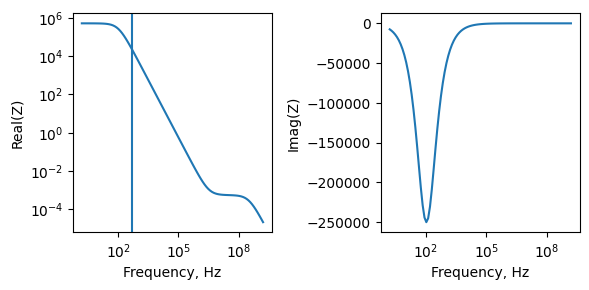

In [214]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

freqs = np.logspace(1, 10, 100)
v = np.array([Vin(o) for o in freqs])

ax1.plot(freqs / 2 / np.pi, np.real(v))
ax2.plot(freqs / 2 / np.pi, np.imag(v))

ax1.axvline([500])
ax1.set(
    xlabel="Frequency, Hz",
    ylabel="Real(Z)",
    xscale="log",
    yscale="log",
)
ax2.set(
    xlabel="Frequency, Hz",
    ylabel="Imag(Z)",
    xscale="log",
)

fig.tight_layout()